<a href="https://colab.research.google.com/github/alejandroclanada/A01720795/blob/main/Presentacion_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Emisiones de Co2 de países del mundo

Alejandro Calanda M - A01720795

Peguntas clave:

¿Existe una correlación entre emisiones de CO2 y la poblacion de países?

¿Se ha hecho algún avance en los ultimos 25 años para bajar las emisiones de CO2 de estos países?


# Lectura y Limpia general de datos

In [2]:
# Se leé la base de datos de Excel
datos = pd.read_excel('owid-co2-data.xlsx')

In [3]:
datos.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,co2_per_gdp,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,share_global_coal_co2,share_global_oil_co2,share_global_gas_co2,share_global_flaring_co2,share_global_cement_co2,cumulative_coal_co2,cumulative_oil_co2,cumulative_gas_co2,cumulative_flaring_co2,cumulative_cement_co2,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,0.002,0.000,0.015,NaN,NaN,0.015,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,0.011,0.001,0.099,0.004,NaN,0.021,NaN,NaN,0.063,NaN,0.001,0.004,NaN,NaN,NaN,0.036,0.063,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,0.012,0.001,0.191,0.005,NaN,0.026,NaN,NaN,0.066,NaN,0.001,0.004,NaN,NaN,NaN,0.061,0.129,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,0.012,0.001,0.282,0.004,NaN,0.032,NaN,NaN,0.060,NaN,0.001,0.003,NaN,NaN,NaN,0.093,0.189,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,0.013,0.002,0.388,0.005,NaN,0.038,NaN,NaN,0.068,NaN,0.001,0.003,NaN,NaN,NaN,0.131,0.257,NaN,NaN,NaN,8040000.0,2.201546e+10


In [4]:
# Se borran todos los países que tienen datos faltantes en las columnas por analizar
datos = datos.dropna()
datos.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,co2_per_gdp,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,share_global_coal_co2,share_global_oil_co2,share_global_gas_co2,share_global_flaring_co2,share_global_cement_co2,cumulative_coal_co2,cumulative_oil_co2,cumulative_gas_co2,cumulative_flaring_co2,cumulative_cement_co2,population,gdp
1518,AUS,Australia,1990,278.425,0.338,0.939,16.416,1.227,7539.773,0.591,3.463,142.009,7.413,34.456,88.842,2.242,1.628,0.964,0.892,2.990,0.694,4819.553,2243.580,374.300,9.938,90.161,16961000.0,4.710000e+11
1519,AUS,Australia,1991,279.873,0.520,1.448,16.282,1.208,7819.646,0.611,3.183,146.280,7.147,32.786,88.247,2.230,1.693,0.912,0.832,2.721,0.621,4965.833,2331.827,407.086,17.085,93.344,17189000.0,4.580000e+11
1520,AUS,Australia,1992,284.912,1.801,5.040,16.372,1.269,8104.558,0.586,2.923,150.277,7.466,33.970,87.916,2.360,1.784,0.960,0.856,3.217,0.547,5116.110,2419.743,441.056,24.550,96.267,17402000.0,4.860000e+11
1521,AUS,Australia,1993,289.235,1.517,4.323,16.431,1.275,8393.794,0.581,3.005,150.307,7.292,35.670,90.387,2.574,1.764,0.984,0.875,3.193,0.541,5266.417,2510.130,476.726,31.843,99.272,17603000.0,4.980000e+11
1522,AUS,Australia,1994,294.015,1.653,4.780,16.519,1.287,8687.809,0.562,3.484,151.518,7.057,37.032,91.924,3.000,1.767,0.997,0.901,3.047,0.589,5417.935,2602.054,513.758,38.900,102.756,17799000.0,5.230000e+11


In [5]:
# Se saca la media de cada columna de cada país correspondiente
# y se muestra en una tabla iniciada por el iso_code, cual viene
# siendo el codigo de 3 letras que se refiere a un país
gb = datos.groupby('iso_code')
gb = gb.mean
gb()

,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,co2_per_gdp,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,share_global_coal_co2,share_global_oil_co2,share_global_gas_co2,share_global_flaring_co2,share_global_cement_co2,cumulative_coal_co2,cumulative_oil_co2,cumulative_gas_co2,cumulative_flaring_co2,cumulative_cement_co2,population,gdp
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,
AUS,2003.0,358.463926,1.475741,4.946074,17.792778,1.277333,11938.182593,0.488519,3.438778,179.640222,8.116037,52.401444,111.377852,3.489704,1.668370,1.050667,0.990185,2.815593,0.416370,7091.843259,3585.666370,972.388852,108.805926,134.494630,2.012356e+07,7.635556e+11
AUT,2003.0,68.520074,0.954593,0.496852,8.353111,0.247667,4333.864889,0.240963,1.804481,15.649370,0.154148,15.842667,33.981074,1.088370,0.147667,0.323333,0.308593,0.053148,0.222889,2479.809111,1292.840074,436.563926,1.984481,107.852037,8.204630e+06,2.954444e+11
BEL,2003.0,118.665148,-0.150556,-0.258704,11.294481,0.436000,10678.712481,0.357481,2.913852,26.833704,0.103296,31.520778,54.836185,2.457370,0.269296,0.526185,0.607815,0.036370,0.362296,7191.419148,2527.576630,749.111444,1.439222,173.834000,1.055304e+07,3.494815e+11
BGR,2003.0,52.207185,-2.037593,-1.523259,6.614333,0.192148,3016.573037,0.605778,1.330704,30.003148,0.231000,7.088630,12.782000,0.771333,0.284481,0.123815,0.145407,0.074741,0.168444,1681.496370,1006.542519,232.693370,2.238222,84.018000,7.877259e+06,9.150836e+10
BLR,2003.0,64.670593,-2.359111,-2.260185,6.632333,0.237667,4248.108481,0.582037,1.385667,3.742481,0.001333,32.757926,24.987259,1.795852,0.037037,0.245963,0.632963,0.000519,0.145889,494.751778,2878.314185,786.300074,10.171556,50.317519,9.737037e+06,1.211144e+11
CAN,2003.0,543.331259,0.763519,3.748667,17.136481,1.955704,24044.015000,0.466630,6.417630,104.484889,15.029889,171.255778,243.296667,2.846185,1.004037,2.306889,3.307148,5.285741,0.769481,8140.523074,10470.631481,4795.864259,339.903778,254.794111,3.175544e+07,1.199481e+12
CHE,2003.0,43.542852,0.069852,-0.008370,5.919407,0.158889,2321.524630,0.129741,1.863556,0.683296,0.040926,5.943778,34.785333,0.226000,0.006630,0.333704,0.114519,0.014444,0.231111,581.831037,1516.950815,112.858704,0.568852,106.009444,7.401926e+06,3.602222e+11
CZE,2003.0,125.383296,-1.694333,-2.432704,12.074593,0.462222,10038.375037,0.559963,1.840185,84.391222,0.311037,16.779926,20.490222,1.570741,0.817259,0.195148,0.329074,0.113259,0.236000,8454.732852,1062.922444,374.967778,4.847556,118.760370,1.039393e+07,2.355556e+11
DEU,2003.0,888.797741,-0.813556,-7.713815,10.964667,3.267630,78686.459481,0.317593,13.935556,384.605074,2.981815,162.329630,315.574556,9.371407,3.691889,3.040148,3.172778,1.070889,1.734704,58723.890556,14680.879852,4132.289370,47.492000,965.268222,8.109833e+07,2.949630e+12


Se logra vizualisar los datos a utilizar y la depuración de ellos

# ¿Existe una correlación entre emisiones de CO2 y la población de países? 

Text(0, 0.5, 'Población (Cientos de millones)')

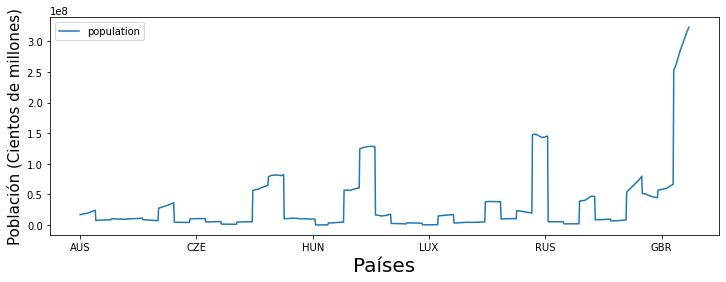

In [14]:
# Se declara el tamaño de las figuras y se gráfica Iso_code y Population
plt.rcParams['figure.figsize'] = (12,4)
datos.plot(x='iso_code',y='population')
plt.xlabel('Países', fontsize = 20) 
plt.ylabel('Población (Cientos de millones)', fontsize = 15)

Text(0, 0.5, 'Co2')

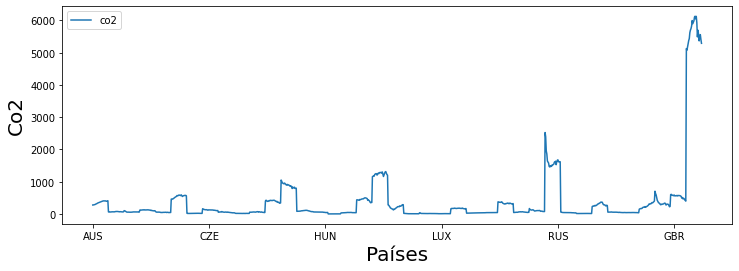

In [7]:
# Se declara el tamaño de las figuras y se gráfica Iso_code y Co2

plt.rcParams['figure.figsize'] = (12,4)
datos.plot(x='iso_code',y='co2')
plt.xlabel('Países', fontsize = 20) 
plt.ylabel('Co2', fontsize = 20)

Se puede observar que las dos gráficas tienen un traso muy parecido, por lo que se puede inferir que existe una correlación, a continuación se hará un análisis de regresión linea para obtener una respuesta matemática

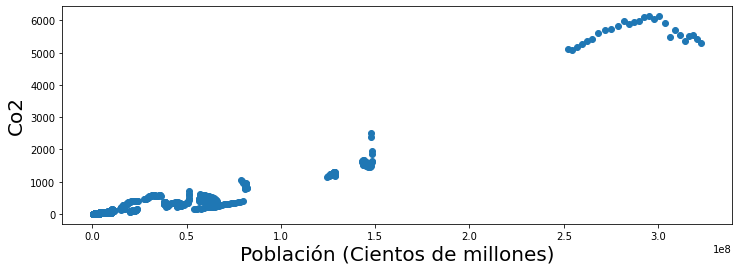

In [8]:
# Se declaran variables para la regresión lineal y se gráfica

y = datos['co2']
x1 = datos['population']

plt.scatter(x1,y) 
plt.xlabel('Población (Cientos de millones)', fontsize = 20)
plt.ylabel('Co2', fontsize = 20)
plt.show()

In [10]:
# Se hace la regresión utilizando las variables 'x' y 'y',
# sm.OLS es una función de la libreria statsmodels.api
# la cuál te permite hacer un análisis de regresión

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     8417.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:54:28   Log-Likelihood:                -7493.0
No. Observations:                1048   AIC:                         1.499e+04
Df Residuals:                    1046   BIC:                         1.500e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -155.6957     11.148    -13.967      0.000    -177.570    -133.821
population  1.633e-05   1.78e-07     91.743      0.000     1.6e-05    1.67e-05
==============================================================================
Omnibus:                      196.666   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1552.943
Skew:                           0.625   Prob(JB):                         0.00
Kurtosis:                       8.831   Cond. No.                     7.32e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

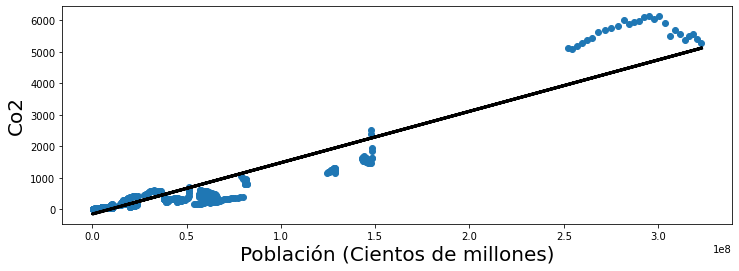

In [15]:
# Se plantea la equación de regresión lineal utilizando el
# coeficiente de la constate del resumen realizado anteriormente
# y el valor de population dado igualmente por el resumen anterior
 

yhat = 0.00001633*x1 - 155.6957


# Se plantea la gráfica y se plantea la línea de regresión lineal
plt.scatter(x1,y)
fig = plt.plot(x1,yhat, lw=3, c='black', label = 'regression line') 
plt.xlabel('Población (Cientos de millones)', fontsize = 20)
plt.ylabel('Co2', fontsize = 20)
 
plt.show()

Se concluye que existe una alta correlación (R^2 = 0.889) entre población y emisiones de co2 de los paises

# ¿Se ha hecho algún avance en los ultimos 25 años para bajar las emisiones de CO2 de estos países?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; y

Text(0, 0.5, 'Co2')

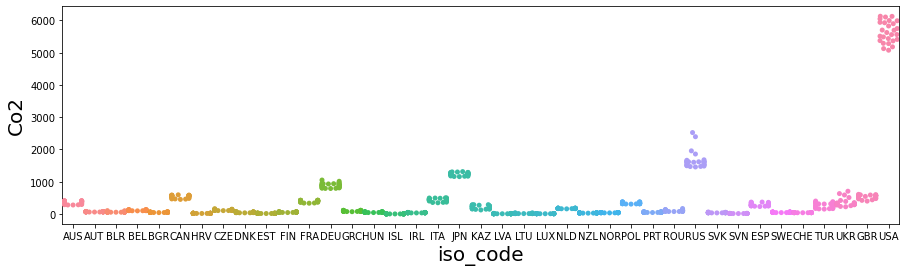

In [12]:
# Se visualiza las emisiones de Co2 por País
plt.rcParams['figure.figsize'] = (15,4) 
sns.swarmplot(x = datos["iso_code"], y = datos["co2"])
plt.xlabel('iso_code', fontsize = 20) 
plt.ylabel('Co2', fontsize = 20)

Text(0, 0.5, 'Co2')

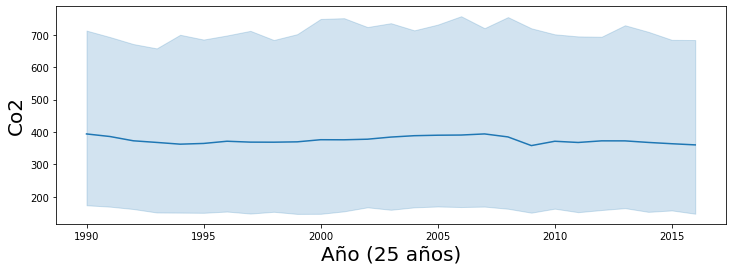

In [13]:
# Se grafica la linea de tendencia de las emisiones promedió de todos los paises por año
plt.rcParams['figure.figsize'] = (12,4)
sns.lineplot(data=datos, x='year', y='co2')
plt.xlabel('Año (25 años)', fontsize = 20) 
plt.ylabel('Co2', fontsize = 20)

Se concluye que no se esta disminuyendo de una forma significativa las emisiones de Co2 de los paises a lo largo de 25 años
